In [43]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

traco = loadmat("traco_v7.mat")["traco"].flatten()
primarias = loadmat("primarias_v7.mat")["primarias"].flatten()[0][0]

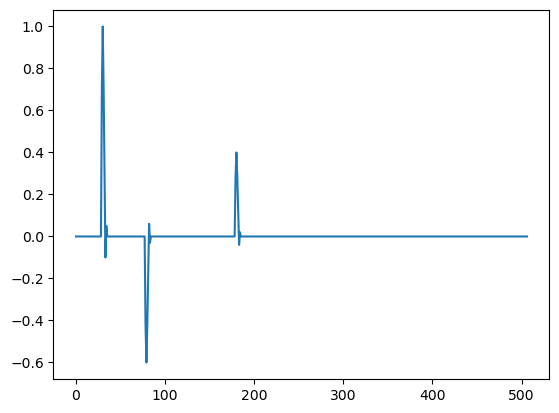

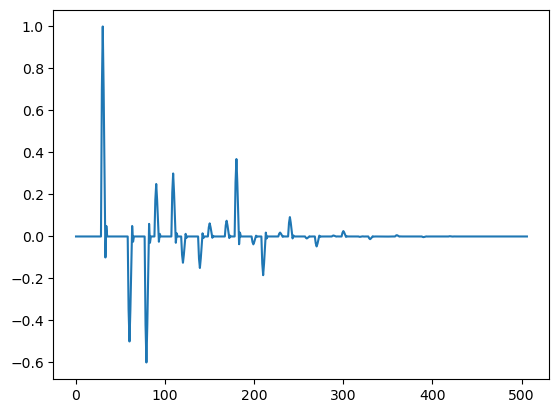

In [44]:
plt.plot(primarias)
plt.show()
plt.plot(traco)

In [53]:
def predictive_deconvolution(data, predictor_order, dt):
    # Criação do vetor de preditores
    predictor = np.zeros(predictor_order)
    output = np.zeros_like(data)

    # Filtrar os dados
    for i in range(predictor_order, len(data)):
        # Calcular a previsão com o preditor
        output[i] = data[i] - np.dot(predictor, data[i-predictor_order:i][::-1])
        
        # Atualizar o preditor
        predictor = np.roll(predictor, -1)
        predictor[-1] = data[i] - output[i]

    return output

# Parâmetros
predictor_order_a = 12
predictor_order_b = 50
dt = 28  # Defina seu passo de amostragem

# Desconvolução
output_a = predictive_deconvolution(traco, predictor_order_a, dt)
output_b = predictive_deconvolution(traco, predictor_order_b, dt)


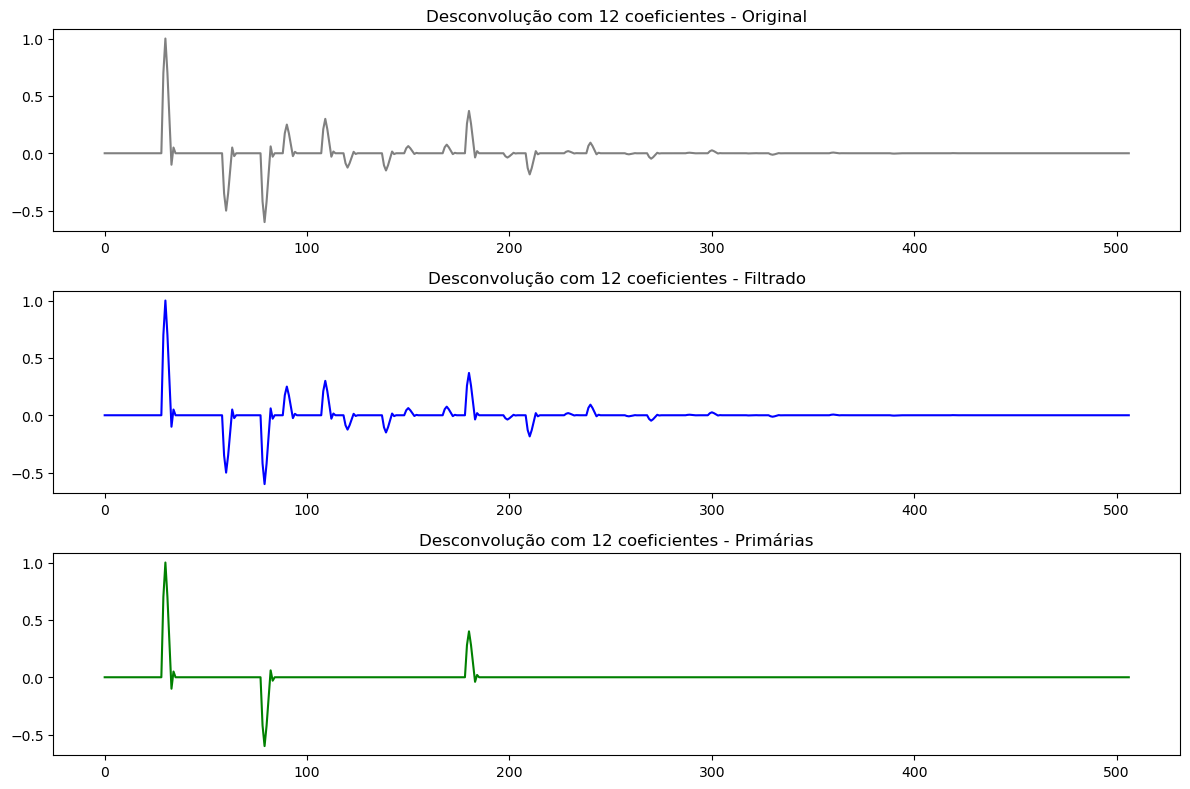

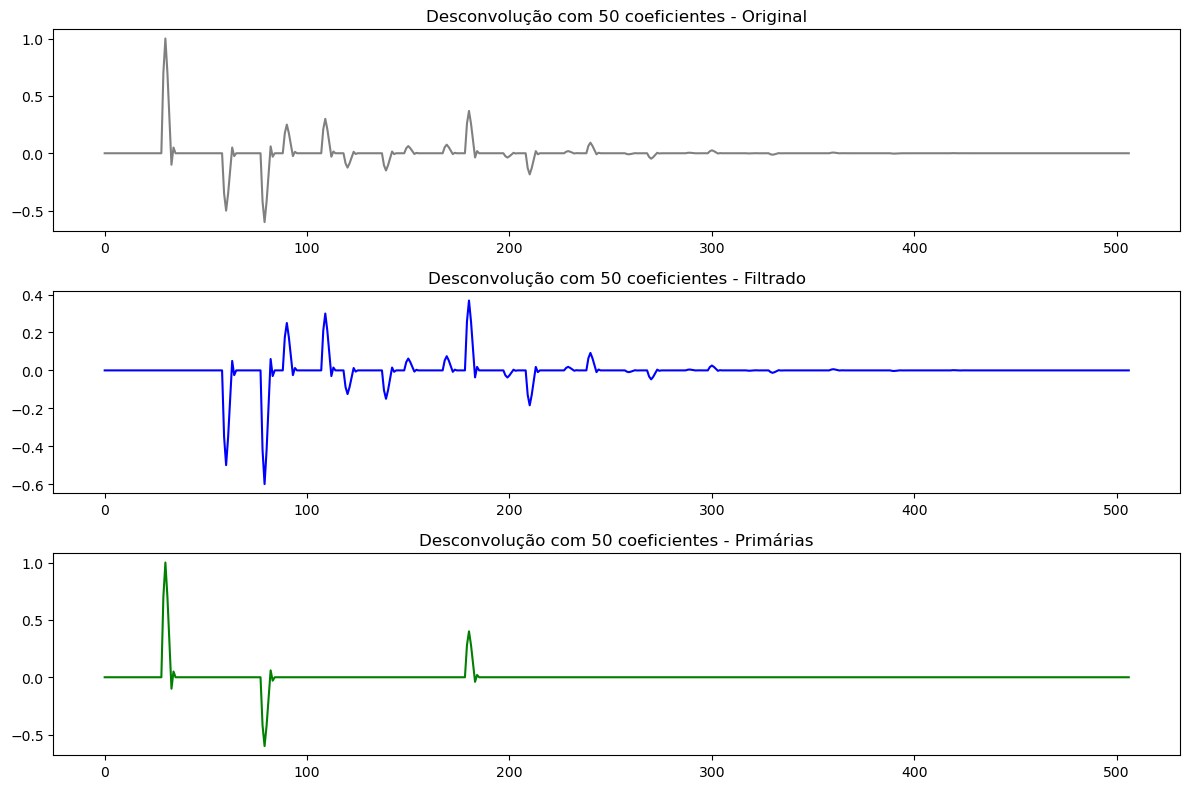

In [54]:
def plot_results(original, filtered, primarias, title):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.title(f'{title} - Original')
    plt.plot(original, color='gray')
    
    plt.subplot(3, 1, 2)
    plt.title(f'{title} - Filtrado')
    plt.plot(filtered, color='blue')
    
    plt.subplot(3, 1, 3)
    plt.title(f'{title} - Primárias')
    plt.plot(primarias, color='green')
    
    plt.tight_layout()
    plt.show()

# Plotar resultados para a parte a)
plot_results(traco, output_a, primarias, "Desconvolução com 12 coeficientes")

# Plotar resultados para a parte b)
plot_results(traco, output_b, primarias, "Desconvolução com 50 coeficientes")


In [55]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_fep_otimo(sinal, num_coeficientes):
    """
    Calcula os coeficientes do Filtro de Estimação de Parâmetros (FEP) ótimo.
    
    :param sinal: O sinal de entrada (numpy array).
    :param num_coeficientes: O número de coeficientes desejados para o filtro.
    :return: Os coeficientes do FEP.
    """
    sinal = np.asarray(sinal)
    R = np.correlate(sinal, sinal, mode='full')
    R = R[len(R)//2:]  # Parte positiva da autocovariância
    
    # Monta a matriz R e o vetor r
    R_matrix = np.zeros((num_coeficientes, num_coeficientes))
    for i in range(num_coeficientes):
        for j in range(num_coeficientes):
            R_matrix[i, j] = R[abs(i - j)]
    
    r = np.zeros(num_coeficientes)
    for i in range(num_coeficientes):
        r[i] = R[i + 1]  # R[0] é a variância do sinal
    
    # Calcula os coeficientes ótimos
    coeficientes = np.linalg.solve(R_matrix, r)
    return coeficientes

def aplicar_fep(sinal, coeficientes):
    """
    Aplica o Filtro de Estimação de Parâmetros (FEP) ao sinal usando coeficientes ótimos.
    
    :param sinal: O sinal de entrada (numpy array).
    :param coeficientes: Coeficientes do filtro (numpy array).
    :return: Sinal filtrado e erro de predição.
    """
    num_coeficientes = len(coeficientes)
    preditor = np.zeros(len(sinal))
    erro = np.zeros(len(sinal))
    
    # Aplicando o filtro
    for n in range(num_coeficientes, len(sinal)):
        # Certifique-se de pegar exatamente num_coeficientes amostras anteriores
        preditor[n] = np.dot(coeficientes, sinal[n-num_coeficientes:n][::-1])
        erro[n] = sinal[n] - preditor[n]
    
    return preditor, erro

traco = loadmat("traco_v7.mat")["traco"].flatten()
primarias = loadmat("primarias_v7.mat")["primarias"].flatten()[0][0]

# Parâmetros
predictor_order_a = 12
predictor_order_b = 50
dt = 28  # Defina seu passo de amostragem

# # Desconvolução
# output_a = predictive_deconvolution(traco, predictor_order_a, dt)
# output_b = predictive_deconvolution(traco, predictor_order_b, dt)

# Parâmetros
error_for_k = {}
mse_for_k = {}

for k in [12, 50]:
    sinal = traco.flatten()
    coeficientes = calcular_fep_otimo(sinal, k)
    preditor, erro = aplicar_fep(sinal, coeficientes)
    error_for_k[str(k)] = erro
    mse_for_k[str(k)] = np.mean(erro ** 2)


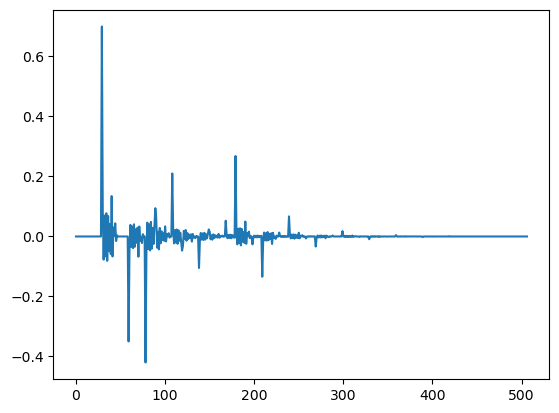

In [60]:
plt.plot(error_for_k["12"])

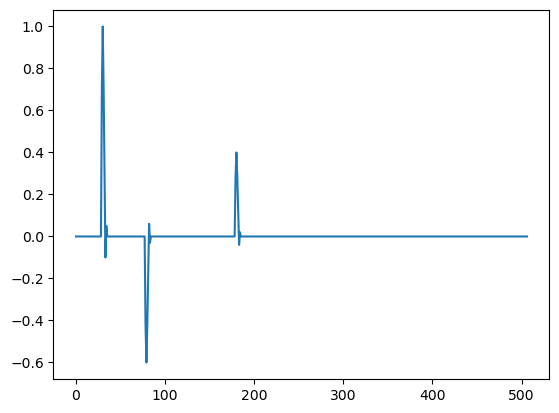

In [63]:
plt.plot(primarias)